# Modelo 1 Tabela Stress

## importações

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
from plotly import __version__
from plotly.offline import download_plotlyjs, plot, iplot, init_notebook_mode
import plotly.express as px
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
from sklearn.model_selection import cross_val_score

## Leitura do CSV e informações da tabela

In [99]:
data = pd.read_csv("..\\assets\\data\\Student Stress Factors.csv")

In [100]:
data.head()

,Sleep Quality,suffer headaches,academic performance,study load,practice extracurricular activities,stress levels
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [101]:
data.columns

Index(['Sleep Quality', 'suffer headaches', 'academic performance',
       'study load', 'practice extracurricular activities', 'stress levels'],
      dtype='object')

In [102]:
#sns.pairplot(data, hue='academic performance')

## Codigo

### New dataframe

In [103]:
scaler = StandardScaler()

In [104]:
scaler.fit(data.drop('academic performance', axis=1))

StandardScaler()

In [105]:
df_normalizado = scaler.transform(data.drop('academic performance', axis=1))

In [106]:
df_normalizado

array([[-0.1138469 , -0.94899385,  0.91170283, -0.46462824,  0.09214761],
       [ 0.7969283 , -0.94899385,  0.18234057,  0.21595397, -0.64503328],
       [-1.0246221 , -0.94899385, -1.27638396,  0.89653619,  0.8293285 ],
       ...,
       [-1.0246221 ,  0.65580876, -1.27638396,  1.57711841, -0.64503328],
       [-0.1138469 ,  1.45821006,  1.64106509, -0.46462824,  1.56650939],
       [ 1.7077035 , -0.94899385,  1.64106509,  1.57711841,  0.8293285 ]])

In [107]:
df_param = pd.DataFrame(df_normalizado, columns=data.drop('academic performance', axis=1).columns)

In [108]:
df_param

,Sleep Quality,suffer headaches,study load,practice extracurricular activities,stress levels
0,-0.113847,-0.948994,0.911703,-0.464628,0.092148
1,0.796928,-0.948994,0.182341,0.215954,-0.645033
2,-1.024622,-0.948994,-1.276384,0.896536,0.829329
3,-0.113847,-0.146593,-0.547022,0.215954,0.092148
4,-1.024622,0.655809,1.641065,1.577118,0.092148
...,...,...,...,...,...
515,-0.113847,-0.146593,-0.547022,0.215954,-1.382214
516,-1.024622,1.458210,-0.547022,-1.145210,-0.645033
517,-1.024622,0.655809,-1.276384,1.577118,-0.645033
518,-0.113847,1.458210,1.641065,-0.464628,1.566509


In [109]:
df_param.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sleep Quality                        520 non-null    float64
 1   suffer headaches                     520 non-null    float64
 2   study load                           520 non-null    float64
 3   practice extracurricular activities  520 non-null    float64
 4   stress levels                        520 non-null    float64
dtypes: float64(5)
memory usage: 20.4 KB


### KNN

In [110]:
X_train, X_test, y_train, y_test = train_test_split(df_param, data['academic performance'], test_size=0.25, random_state=1)

In [111]:
knn = KNeighborsClassifier(n_neighbors=1)

In [112]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [113]:
pred = knn.predict(X_test)

In [114]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       0.95      0.98      0.97        43
           4       0.98      1.00      0.99        45
           5       1.00      0.89      0.94        19

    accuracy                           0.98       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.98      0.98      0.98       130



In [115]:
print(confusion_matrix(y_test,pred))

[[10  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 42  1  0]
 [ 0  0  0 45  0]
 [ 0  0  2  0 17]]


In [116]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

In [117]:
error_rate

[0.023076923076923078,
 0.023076923076923078,
 0.023076923076923078,
 0.046153846153846156,
 0.14615384615384616,
 0.2846153846153846,
 0.3384615384615385,
 0.35384615384615387,
 0.36153846153846153,
 0.3230769230769231,
 0.2846153846153846,
 0.2923076923076923,
 0.36923076923076925,
 0.36153846153846153,
 0.38461538461538464,
 0.4076923076923077,
 0.4307692307692308,
 0.4307692307692308,
 0.4230769230769231,
 0.4461538461538462,
 0.45384615384615384,
 0.43846153846153846,
 0.5076923076923077,
 0.5384615384615384,
 0.5538461538461539,
 0.5692307692307692,
 0.5846153846153846,
 0.5615384615384615,
 0.5769230769230769,
 0.5384615384615384,
 0.6,
 0.6230769230769231,
 0.6153846153846154,
 0.6076923076923076,
 0.6307692307692307,
 0.6,
 0.5846153846153846,
 0.5923076923076923,
 0.5846153846153846]

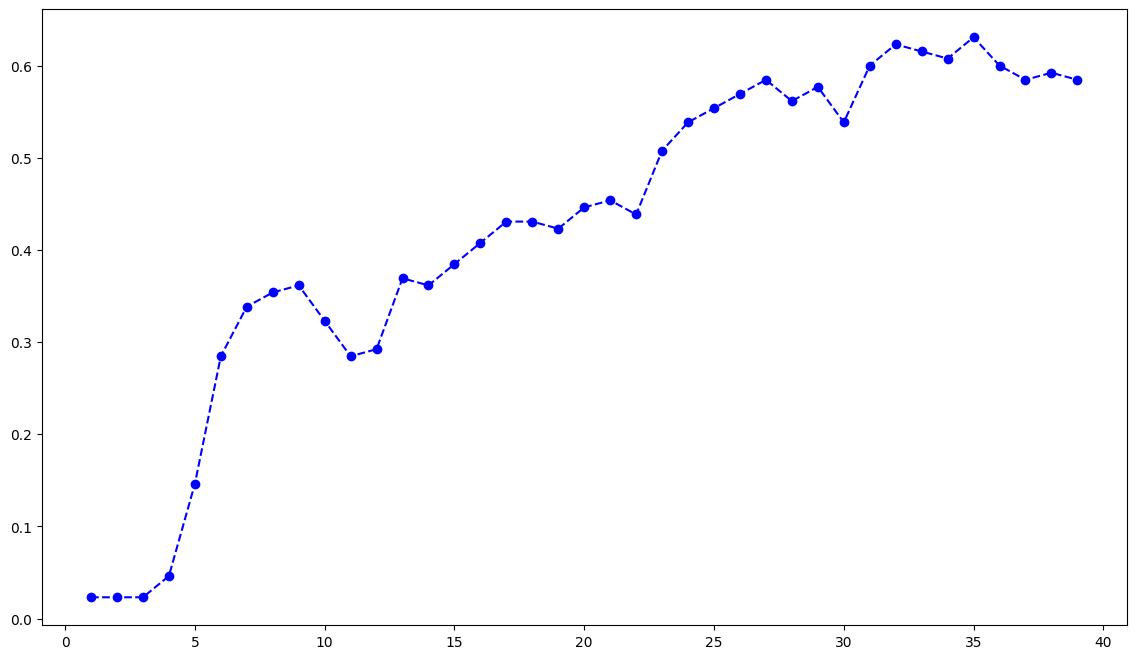

In [118]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o')

In [119]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [120]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       0.95      0.98      0.97        43
           4       0.98      1.00      0.99        45
           5       1.00      0.89      0.94        19

    accuracy                           0.98       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.98      0.98      0.98       130



[[10  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 42  1  0]
 [ 0  0  0 45  0]
 [ 0  0  2  0 17]]


### Grafico

# Modelo 1 Tabela Performace

## Leitura do CSV e importações

In [121]:
data2 = pd.read_csv("..\\assets\\data\\performance_data_Index_convertido_por_faixas.csv")

In [122]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Performance Index Faixa                 10000 non-null  int64
 1   Sample Question Papers Practiced Faixa  10000 non-null  int64
 2   Hours Studied Faixa                     10000 non-null  int64
 3   Extracurricular Activities Faixa        10000 non-null  int64
 4   Sleep Hours Faixa                       10000 non-null  int64
dtypes: int64(5)
memory usage: 390.8 KB


In [123]:
data2.head()

,Performance Index Faixa,Sample Question Papers Practiced Faixa,Hours Studied Faixa,Extracurricular Activities Faixa,Sleep Hours Faixa
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


In [124]:
data2.columns

Index(['Performance Index Faixa', 'Sample Question Papers Practiced Faixa',
       'Hours Studied Faixa', 'Extracurricular Activities Faixa',
       'Sleep Hours Faixa'],
      dtype='object')

## Codigo

### New DataFrame

In [125]:
scaler2 = StandardScaler()
scaler2.fit(data2.drop('Performance Index Faixa', axis=1))

StandardScaler()

In [126]:
df2_normalizado = scaler2.transform(data2.drop('Performance Index Faixa', axis=1))

In [127]:
df2_normalizado

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [128]:
df2_param = pd.DataFrame(df2_normalizado, columns=data2.drop('Performance Index Faixa', axis=1).columns)

In [129]:
df2_param.head()

,Sample Question Papers Practiced Faixa,Hours Studied Faixa,Extracurricular Activities Faixa,Sleep Hours Faixa
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [130]:
df2_param.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Sample Question Papers Practiced Faixa  10000 non-null  float64
 1   Hours Studied Faixa                     10000 non-null  float64
 2   Extracurricular Activities Faixa        10000 non-null  float64
 3   Sleep Hours Faixa                       10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


### KNN

In [131]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df2_param, data2['Performance Index Faixa'], test_size=0.20, random_state= 20)

In [132]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X2_train, y2_train)
pred2 = knn2.predict(X2_test)

In [133]:
print(classification_report(y2_test,pred2))
print('\n')
print(confusion_matrix(y2_test,pred2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



[[2000]]


c:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.



In [134]:
error_rate2 = []

for i in range(1,40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X2_train, y2_train)
    pred2 = knn2.predict(X2_test)
    error_rate2.append(np.mean(pred2!=y2_test))

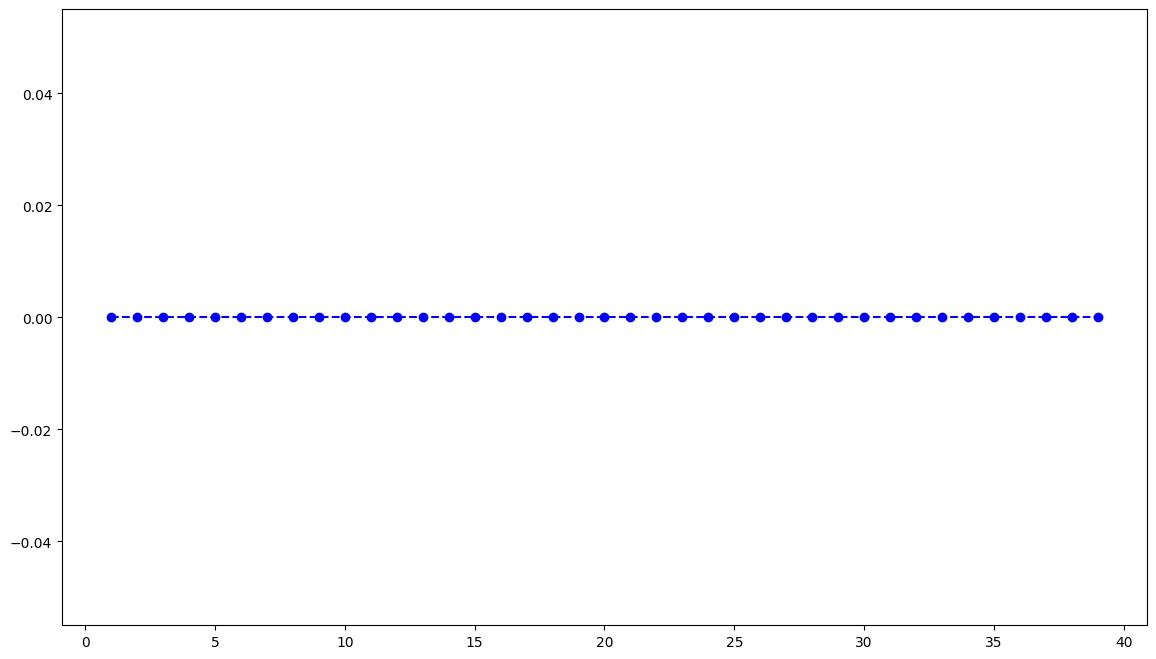

In [135]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40), error_rate2, color='blue', linestyle='dashed', marker='o')

In [136]:
knn2 = KNeighborsClassifier(n_neighbors=38)
knn2.fit(X2_train, y2_train)
pred2 = knn2.predict(X2_test)

In [137]:
print(classification_report(y2_test,pred2))
print('\n')
print(confusion_matrix(y2_test,pred2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



[[2000]]


c:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.



In [138]:
scores = cross_val_score(knn2, data2, data2['Performance Index Faixa'], cv=3, scoring='accuracy')

print(scores,"\n")

# Results
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1. 1. 1.] 

Accuracy: 1.00 (+/- 0.00)
